# Module 6 Python Assignment

<div class="alert alert-block alert-warning"><b>In this assignment you will read through the notebook and complete the exercises. Once you are satisfied with the results, submit your notebook and html file to Canvas. Your files should include all output, i.e. run each cell and save your file before submitting.</b></div>

<div class="alert alert-block alert-info"> 
<b>Module 6 </b> is a continuation of EDA that you started in Module 5.  You will read in your file that you saved from Module 5 and continue on EDA with a focus on visuals. <br>
    
<b>Research project problem statement:</b> A brewery has a number of signature beers that they produce and they want to expand their production in to a different style of beer.  They have hired you to help them understand how the beer reviewers rate the qualities of the beers already on the market?  They want to know how different styles of beers are rated. They are also thinking about a seasonal beer but are not sure if seasonal beers are rated highly?  You will use the data that you cleaned in Module 5 for this research.
  

You will use a number of EDA techniques to answer these questions and many more.
</div>

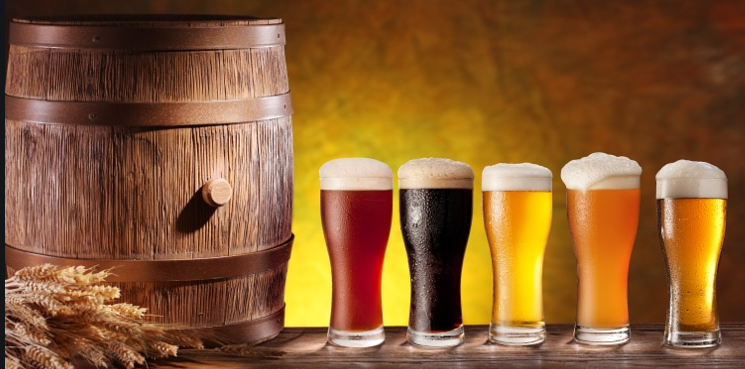

<div class="alert alert-block alert-danger"><b>In many of the problems you will see <font color=black>#TODO</font> statements added as comments on the code cell provided. You will want to be sure to complete each of these as indicated to avoid losing points.</b></div>

In [1]:
# load up modules
import pandas as pd
import numpy as np
# load for visuals
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# set up notebook to display multiple output in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

<div class="alert alert-block alert-warning"><b>Summary of steps taken in this notebook:
    </b><br>
1. Deciding what to analyze - examine date ranges<br>
2. Look at outliers<br>
3. Creating new fields <br>
4. Are all fields created equal? <br>
5. Looking for the highly rated beers, breweries and beer styles <br>
6. Time Series plot - by days and by month <br>
7. Season analysis <br>
    
<b><u> Best practice</b></u> - we have discussed that the process of EDA is an iteration with each change to the data providing a new view of the data.  Depending on how you are manipulating the data, you should look at your data before a change and after a change so that you are confident that the code did as you expected.  The inspection of the data can be via any combination of shape, info, describe, boxplot, etc.
</div>

### Read in data


In [41]:
# read in file from module 5
df = pd.read_csv('beer_reviews_final.csv')

# what is the shape of the data
df.shape
# look at first five records
df.head()

(331554, 11)

brewery_name  review_overall  review_aroma  review_appearance  \
0  Caldera Brewing Company             3.0           3.5                3.5   
1  Caldera Brewing Company             3.5           3.5                3.5   
2  Caldera Brewing Company             3.0           2.5                3.5   
3  Caldera Brewing Company             3.0           3.0                2.5   
4  Caldera Brewing Company             4.5           4.5                3.0   

  review_profilename            beer_style  review_palate  review_taste  \
0            oline73  Herbed / Spiced Beer            3.0           3.5   
1          Reidrover  Herbed / Spiced Beer            4.0           4.0   
2       alpinebryant  Herbed / Spiced Beer            2.0           3.5   
3   Beerandraiderfan         Oatmeal Stout            3.0           3.0   
4        UCLABrewN84             Rauchbier            4.0           4.5   

               beer_name  beer_abv review_date  
0    Caldera Ginger Beer       4.7  2012-01-02  
1    Caldera Ginger Beer       4.7  2011-10-19  
2    Caldera Ginger Beer       4.7  2011-05-24  
3  Caldera Oatmeal Stout       7.2  2011-09-14  
4          Rauch Ür Bock       7.4  2012-01-02

In [38]:
# check for nulls and for data types
# if you did your assignment correctly for module 5, there should be no nulls
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331554 entries, 0 to 331553
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   brewery_name        331554 non-null  object 
 1   review_overall      331554 non-null  float64
 2   review_aroma        331554 non-null  float64
 3   review_appearance   331554 non-null  float64
 4   review_profilename  331554 non-null  object 
 5   beer_style          331554 non-null  object 
 6   review_palate       331554 non-null  float64
 7   review_taste        331554 non-null  float64
 8   beer_name           331554 non-null  object 
 9   beer_abv            331554 non-null  float64
 10  review_date         331554 non-null  object 
dtypes: float64(6), object(5)
memory usage: 27.8+ MB


## Deciding what data to analyze - examine date ranges

In [39]:
# let's check out our date info
yearmonth = df['review_date'].str[0:7]

# We have all of 2011 and part of January 2012
yearmonth.value_counts().sort_index()

2011-01    28878
2011-02    27369
2011-03    28204
2011-04    25858
2011-05    27919
2011-06    26156
2011-07    27128
2011-08    28055
2011-09    25804
2011-10    25895
2011-11    25348
2011-12    25597
2012-01     9343
Name: review_date, dtype: int64

<div class="alert alert-block alert-success"><b>Problem 1 (2 pts.)</b>: Drop January 2012 from your data so that you are only analyzing the 12 months of 2011.  Show that your dataframe only contains 2011 data by showing a monthly count (see below).
    
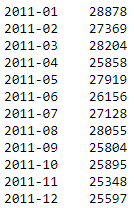
</div>

In [44]:
# TODO show the shape of your data
df.shape
# TODO only keep 2011 data for analysis
df = df[df['review_date'].str[0:7] <= '2011-12']
# TODO show the new shape of the data
df.shape
# TODO show your dataframe contains 2011 data with monthly counts
df['review_date'].str[0:7].value_counts().sort_index()

(331554, 11)

(322211, 11)

2011-01    28878
2011-02    27369
2011-03    28204
2011-04    25858
2011-05    27919
2011-06    26156
2011-07    27128
2011-08    28055
2011-09    25804
2011-10    25895
2011-11    25348
2011-12    25597
Name: review_date, dtype: int64

## Deciding what to analyze - looking at outliers

In examination of beer_abv using a boxplot, there appears to be outliers beyond 15 percent alcohol.

What are reasonable alcohol levels for beer?  According to the link provided, average alcohol levels for beer are around the 5 percent level. https://www.alcohol.org/statistics-information/abv/

There are a lot of values over 15, so next we'll take a closer look at them. Note that it is possible to specify the percentiles within describe( ).

count    322211.000000
mean          7.386064
std           2.427250
min           0.010000
25%           5.500000
50%           7.000000
75%           9.000000
95%          11.500000
max          57.700000
Name: beer_abv, dtype: float64

<AxesSubplot:>

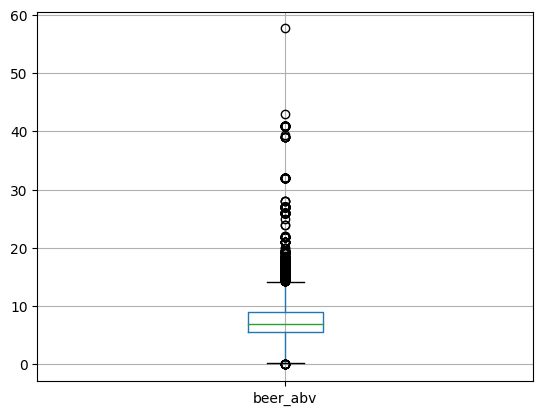

In [45]:
df['beer_abv'].describe(percentiles = [.25, .5, .75, .95])

df.boxplot(column = 'beer_abv')

Now we can isolate the beers with alcohol content over 15% and take a closer look.

In [46]:
# isolate beers with alcohol content over 15
x = df[df['beer_abv'] > 15]

# how many reviews are there? 2513
len(x)

# how many unique beers is that? 94
x['beer_name'].unique().shape

# do they look like valid abv values? Or are they mislabeled?
x

2513

(94,)

brewery_name  review_overall  review_aroma  review_appearance  \
2908          Schorschbräu             4.0           3.5                2.5   
2909          Schorschbräu             4.0           4.0                4.0   
2910          Schorschbräu             4.0           4.0                3.5   
2911          Schorschbräu             3.0           3.0                3.0   
10601           The Bruery             4.5           4.5                4.0   
...                    ...             ...           ...                ...   
292573  Legend Brewing Co.             3.0           4.5                4.0   
292574  Legend Brewing Co.             4.0           3.5                3.5   
292575  Legend Brewing Co.             4.0           3.5                4.0   
292576  Legend Brewing Co.             2.0           2.5                2.0   
292631  Legend Brewing Co.             4.5           4.0                3.0   

       review_profilename           beer_style  review_palate  review_taste  \
2908               MTNboy           Weizenbock            4.0           4.0   
2909          kappldav123              Eisbock            4.0           3.5   
2910             Sunnanek              Eisbock            4.0           4.0   
2911            orangesol              Eisbock            2.0           3.0   
10601        alcstradamus  American Strong Ale            4.5           4.5   
...                   ...                  ...            ...           ...   
292573           McKeag24  American Barleywine            3.0           3.5   
292574           ramseye4  American Barleywine            4.0           3.5   
292575                JCQ  American Barleywine            3.0           4.0   
292576        dragonWhale  American Barleywine            1.5           1.5   
292631     altctrlsdelete  American Barleywine            5.0           4.5   

                            beer_name  beer_abv review_date  
2908              Schorsch Weizen 16%     16.00  2011-07-13  
2909    Schorschbräu Schorschbock 57%     57.70  2011-09-23  
2910    Schorschbräu Schorschbock 43%     43.00  2011-07-06  
2911    Schorschbräu Schorschbock 40%     39.44  2011-11-11  
10601                   Melange No. 3     15.50  2011-01-29  
...                               ...       ...         ...  
292573                Barleywine 2010     15.60  2011-03-11  
292574                Barleywine 2010     15.60  2011-02-08  
292575                Barleywine 2010     15.60  2011-01-27  
292576                Barleywine 2010     15.60  2011-01-08  
292631                Barleywine 2009     15.30  2011-05-28  

[2513 rows x 11 columns]

<div class="alert alert-block alert-success"><b>Problem 2 (2 pts.)</b>: The data appears to be valid and accurate as the beer name in many cases matches the percent alcohol (Schorsch Weizen 16% as an example). So there are real beers with high alcohol content. But the high alcohol content beers are unusual in the beer market and not mainstream enough for our client, so let's drop those with alcohol content above 11.5% from our analysis. Also, our client does not want to make a non-alcoholic beer so also drop any beer with less than 1% alcohol.
</div>

(322211, 11)

(307636, 11)

<AxesSubplot:>

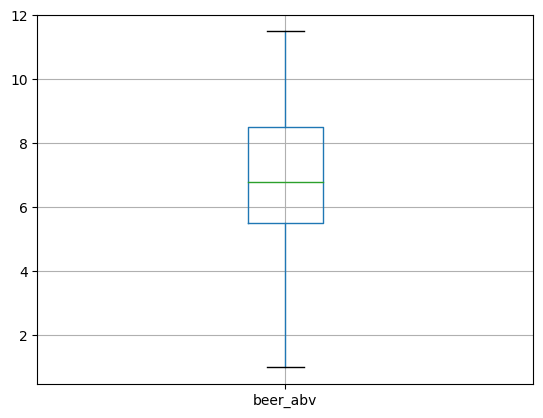

In [60]:
#TODO show the shape of your data
df.shape
#TODO Drop all beers with an alcohol content under 1 percent and over 11.5 percent
df = df[(df['beer_abv'] >= 1) & (df['beer_abv'] <= 11.5)]
#TODO show the shape of your data
df.shape
#TODO display another boxplot to show beer_abv
df.boxplot(column = 'beer_abv')

In [61]:
# now look at how the change to the data affected the description stats
df['beer_abv'].describe(percentiles = [.25, .5, .75, .95])

count    307636.000000
mean          7.093846
std           1.938652
min           1.000000
25%           5.500000
50%           6.800000
75%           8.500000
95%          10.500000
max          11.500000
Name: beer_abv, dtype: float64

## Deciding what data to analyze - creating new fields

Since we're only interested in the data from 2011, we can extract just the month from our data and create a new column for this.

In [66]:
# create a new column for month
df['month'] = df['review_date'].str[5:7]
df['month'].value_counts().sort_index()

01    27509
02    26091
03    26942
04    24746
05    26564
06    24927
07    25882
08    26949
09    24881
10    24799
11    24173
12    24173
Name: month, dtype: int64

One of the questions from our client is about seasonal beers. With this in mind, we'll create a dictionary called `seasons` that we will use later in our analysis. We will use our `month` variable as the key. We will do more with dictionaries next week, but until then here is some more information on them: __[dictionaries](https://docs.python.org/3/tutorial/datastructures.html#dictionaries)__

Note that `map( )` is a built-in function that is an iteration tool. More information can be found here: __[built-in functions](https://docs.python.org/3/library/functions.html#map)__

In [69]:
# create a dictionary called 'seasons' using the 'month' variable

seasons = {'01' : 'Winter', '12' : 'Winter', '02' : 'Winter',
           '03' : 'Spring', '04' : 'Spring', '05' : 'Spring',
           '06' : 'Summer', '07' : 'Summer', '08' : 'Summer',
           '09' : 'Fall',   '10' : 'Fall',   '11' : 'Fall'}
df['season'] = df['month'].map(seasons)
df.sample(5)

brewery_name  review_overall  review_aroma  \
228671  Brouwerij Rodenbach N.V.             4.5           2.0   
42051   Desnoes & Geddes Limited             2.5           2.5   
192988         Stone Brewing Co.             4.5           4.0   
302805         Deschutes Brewery             4.5           5.0   
302242         Deschutes Brewery             4.0           4.5   

        review_appearance review_profilename  \
228671                4.0            bobhits   
42051                 3.0         TMoney2591   
192988                4.0            Daktyls   
302805                4.5       SDtastentune   
302242                4.0       paulozanello   

                              beer_style  review_palate  review_taste  \
228671                  Flanders Red Ale            4.0           4.0   
42051                        Light Lager            3.0           2.0   
192988                Milk / Sweet Stout            4.0           4.5   
302805                American Black Ale            4.5           4.5   
302242  American Double / Imperial Stout            4.5           5.0   

                                                beer_name  beer_abv  \
228671                            Rodenbach Classic (Red)       5.2   
42051                                    Red Stripe Light       3.6   
192988  Jason Fields & Kevin Sheppard / Tröegs / Stone...       7.3   
302805                 Hop In The Dark Cascadian Dark Ale       6.9   
302242                                          The Abyss      11.0   

       review_date month  season  
228671  2011-11-06    11    Fall  
42051   2011-11-19    11    Fall  
192988  2011-09-15    09    Fall  
302805  2011-08-16    08  Summer  
302242  2011-02-02    02  Winter

## Deciding what data to analyze - are all values created equal?

We will create a correlation matrix and Seaborn heatmap to investigate how rating, taste, and alcohol level are related. More information on creating a heatmap using Seaborn can be found here: __[Seaborn heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)__

What does the correlation matrix below tell us?  It tells us that there is a high positive correlation between the overall review score and the taste score which makes sense since good tasting beer should get a high overall rating. The red colored boxes in the heat map indicate slight negative relationships betwen the scores shown and the beer alcohol level. This is an interesting finding because it suggests that the amount of alcohol in the beer doesn't matter that much in terms of the ratings. <br>

Notice that the correlation matrix and the heatmap are two different ways to present the same data.

review_overall  review_taste  beer_abv
review_overall        1.000000      0.845788  0.211173
review_taste          0.845788      1.000000  0.257504
beer_abv              0.211173      0.257504  1.000000

<AxesSubplot:>

Text(0.5, 1.0, 'Heatmap Beer Review ratings')

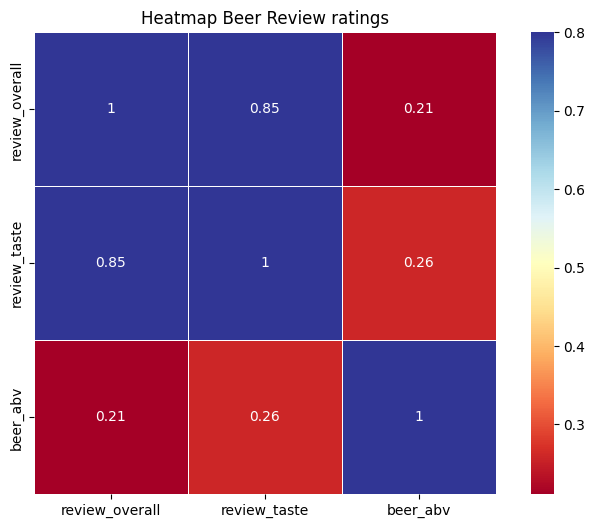

In [70]:
# setting the columns to correlate
columns = ['review_overall','review_taste', 'beer_abv']
df_corr = df[columns]
# running the correlation
df_corr.corr()

# setting up the heatmap
corrmat = df_corr.corr()

# set the figure size
f, ax = plt.subplots(figsize=(9, 6))

# pass the data and set the parameters
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, cmap='RdYlBu', linewidths=.5 )
plt.title('Heatmap Beer Review ratings')

# images can be saved - default is .png
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.savefig.html
plt.savefig('Correlation Heat Map Beer Reviews')

<div class="alert alert-block alert-success"><b>Problem 3 (3 pts.)</b>: Create a data matrix with all six of the numeric variables in the dataframe and create a heatmap using all six numeric variables with a new color scheme. Explain how the visual cues of the heatmap represent the correlations.
</div>

<AxesSubplot:>

Text(0.5, 1.0, 'Heatmap All Beer Review ratings')

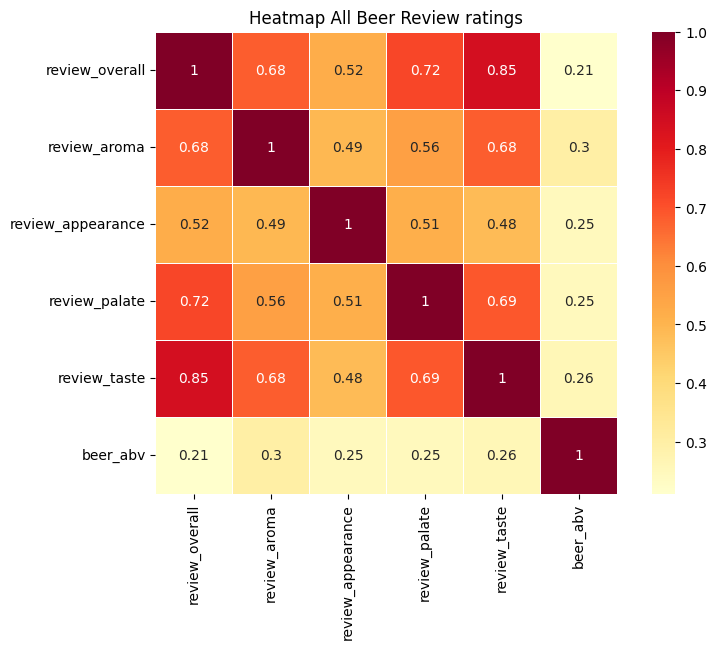

In [85]:
# TODO create a data matrix using all six numeric variables
num_columns = ['review_overall', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste', 'beer_abv']
df_num = df[num_columns]
# TODO create a heat map using all six numeric variables. Pick a new color combination.
# https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html
num_corrmat = df_num.corr()
fig, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(num_corrmat, vmax=1, square=True, annot=True, cmap='YlOrRd', linewidths=.5 )
plt.title('Heatmap All Beer Review ratings')
#TODO explain how the visual cues of the heatmap represent the correlations.

# The heatmap diverges in color from red being the highest score and yellow being the lowest. 
# This means that when the correlation score is high, the color is red and when the score is low, the color is yellow.
# When the correlation score is around 0.5, the color becomes orange which is the color between red and yellow.

## Deciding what to analyze - looking for the highly rated beers

The `review_overall` score was highly correlated enough with all of the other review scores that we will use just the `review_overall` score for our analysis on top beers.

Let's look at top beers three different ways: by brewery, by style, and by individual beer.

In [86]:
# look at mean of overall review and the number of reviews
brewery = df['review_overall'].groupby(df['brewery_name']).agg(['mean','count'])

# Notice that looking at just the mean is misleading as those that have a rating 5.0 have only 1 
#     or 2 reviews
# we could eliminate the low count, or instead focus on the high count
# 
brewery.sort_values(by=['count'], ascending = False)[:20]
brewery.sort_values(by=['mean'], ascending = False)[:10]

mean  count
brewery_name                                       
Boston Beer Company (Samuel Adams)  3.657522   8129
Sierra Nevada Brewing Co.           3.976662   7327
Stone Brewing Co.                   3.981495   6917
Dogfish Head Brewery                3.904645   5899
Founders Brewing Company            4.227471   5038
Bell's Brewery, Inc.                3.960738   4661
Lagunitas Brewing Company           3.980979   3943
New Belgium Brewing                 3.809727   3876
Cigar City Brewing                  3.997908   3585
Southern Tier Brewing Company       3.859581   3340
Victory Brewing Company             3.897019   3321
Russian River Brewing Company       4.341978   3297
Great Divide Brewing Company        3.936391   3270
Three Floyds Brewing Co. & Brewpub  4.135267   3068
Deschutes Brewery                   4.087845   2937
Rogue Ales                          3.816005   2924
Goose Island Beer Co.               3.881198   2622
Tröegs Brewing Company              3.944684   2549
The Bruery                          3.895637   2544
Avery Brewing Company               3.846972   2444

mean  count
brewery_name                                  
Fossil Fuels Brewing Company        5.0      1
4 Hands Brewing Co.                 5.0      2
Moccasin Bend Brewing Co.           5.0      1
Callahan's Pub & Brewery            5.0      1
Round Guys Brewing Company          5.0      1
Blue Corn Brewery                   5.0      1
Pivara Tuzla                        5.0      2
Binghams Brewery                    5.0      1
Thai Me Up                          5.0      1
Liebhart's Privatbrauerei Detmold   5.0      1

In [90]:
# repeat for beer style
beerStyle = df['review_overall'].groupby(df['beer_style']).agg(['mean','count'])
beerStyle.sort_values(by=['count'], ascending = False)[:20]

mean  count
beer_style                                       
American IPA                      3.904576  27886
American Double / Imperial IPA    4.017937  22858
American Pale Ale (APA)           3.815287  12422
American Double / Imperial Stout  4.060454  12125
Russian Imperial Stout            3.998751  10805
American Porter                   3.887210  10227
Saison / Farmhouse Ale            3.906273   9309
American Amber / Red Ale          3.767042   7995
American Wild Ale                 4.067572   6408
American Black Ale                3.919709   6246
Fruit / Vegetable Beer            3.430011   6151
American Strong Ale               3.891665   6083
Belgian Strong Dark Ale           3.888148   5999
Belgian Strong Pale Ale           3.871540   5889
American Brown Ale                3.807016   5516
American Stout                    3.804733   5134
Witbier                           3.671157   4899
Tripel                            3.920633   4769
Pumpkin Ale                       3.658937   4291
American Barleywine               3.896131   4265

In [91]:
# repeat for beer name
beers = df['review_overall'].groupby(df['beer_name']).agg(['mean','count'])
beers.sort_values(by=['count'], ascending = False)[:20]

mean  count
beer_name                                                          
Pliny The Elder                                     4.614130    736
Bell's Hopslam Ale                                  4.436519    701
Stone 15th Anniversary Escondidian Imperial Bla...  4.158768    633
Double Jack                                         4.200949    632
Founders Breakfast Stout                            4.450886    621
Old Rasputin Russian Imperial Stout                 4.314414    555
Founders KBS (Kentucky Breakfast Stout)             4.548358    548
Hoptimum Double IPA - Beer Camp #19                 3.850093    537
Two Hearted Ale                                     4.248062    516
90 Minute IPA                                       4.194274    489
Samuel Adams Noble Pils                             3.997912    479
Sierra Nevada Torpedo Extra IPA                     4.110753    465
Tröegs Nugget Nectar                                4.387309    457
India Pale Ale                                      3.798643    442
Stone Ruination IPA                                 4.233945    436
Sierra Nevada Celebration Ale                       4.165888    428
Sculpin India Pale Ale                              4.297897    428
Imperial Stout                                      3.895294    425
Sierra Nevada Bigfoot Barleywine Style Ale          4.024706    425
Brooklyn Black Chocolate Stout                      4.082339    419

In [102]:
# a table heat map can help point out top values
z = brewery.sort_values(by=['count'], ascending = False)[:50]
z.style.background_gradient(cmap = 'Blues')

# what does this heatmap help us see?
# top breweries to investigate based on review_overall 
#  Russian River Brewing Company
#  Brasserie Cantillian
#  Founders Brewing Company
#  Surly Brewing Company


<div class="alert alert-block alert-success"><b>Problem 4 (4 pts.)</b>: Create a heat map for both beer styles and for individual beers showing the top 50 based on the count of review_overall.  Which three beer styles are top rated and which three individual beers are top rated?  Optional: create the heatmap with different colors.
</div>

In [104]:
# TODO create a heatmap for beer styles
w = beerStyle.sort_values(by=['count'], ascending = False)[:50]
w.style.background_gradient(cmap = 'Greens')

# TODO list top three beer styles based on mean rating
w_ = beerStyle.sort_values(by=['mean'], ascending = False)[:3]
w_.style.background_gradient(cmap = 'GnBu')

In [105]:
# TODO create a heatmap for individual beers
v = beers.sort_values(by=['count'], ascending = False)[:50]
v.style.background_gradient(cmap = 'Reds')

# TODO list top three beers based on mean rating
v_ = beers.sort_values(by=['mean'], ascending = False)[:3]
v_.style.background_gradient(cmap = 'OrRd')

There are plenty of ways to slice and dice data. A heatmap is a nice visual, but there are other ways to analyse the data. Below is an example of an easy way to change the count number to see if lower count reviews have a higher review score.

Try changing the comparison value of 600 to 400 and see how the results change.

In [107]:
# set the comparison value to more than 600

temp = beers[beers['count'] > 600]
temp['mean'].nlargest(5)

# change the comparison value of 600 above to 400 and see how the results change
temp_ = beers[beers['count'] > 400]
temp_['mean'].nlargest(5)

beer_name
Pliny The Elder                                          4.614130
Founders Breakfast Stout                                 4.450886
Bell's Hopslam Ale                                       4.436519
Double Jack                                              4.200949
Stone 15th Anniversary Escondidian Imperial Black IPA    4.158768
Name: mean, dtype: float64

beer_name
Pliny The Elder                            4.614130
Founders KBS (Kentucky Breakfast Stout)    4.548358
The Abyss                                  4.509852
Founders Breakfast Stout                   4.450886
Bell's Hopslam Ale                         4.436519
Name: mean, dtype: float64

## Time Series plot

Next we will look at our total number of beer reviews by day.  Note that when data is stored in a csv file, it does not retain the date field type; the review_date in this module was read in as an Object - which is the default.

There are a few ways to handle date fields.  If you know you are reading in a date field from a csv file, you can specify so in the read_csv command:
df = pd.read_csv('beer6.csv',parse_dates = ['review_date'])

Or you can convert a date in an Object field into a Date field, which is shown below.

In [111]:
# convert review_date to a date format
df['review_date'] = pd.to_datetime(df['review_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307636 entries, 1 to 331553
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   brewery_name        307636 non-null  object        
 1   review_overall      307636 non-null  float64       
 2   review_aroma        307636 non-null  float64       
 3   review_appearance   307636 non-null  float64       
 4   review_profilename  307636 non-null  object        
 5   beer_style          307636 non-null  object        
 6   review_palate       307636 non-null  float64       
 7   review_taste        307636 non-null  float64       
 8   beer_name           307636 non-null  object        
 9   beer_abv            307636 non-null  float64       
 10  review_date         307636 non-null  datetime64[ns]
 11  month               307636 non-null  object        
 12  season              307636 non-null  object        
dtypes: datetime64[ns](1), float64

In [112]:
# to plot by date, we need one sum for each date
# lets group by date and create a df that we can plot
df_date = pd.DataFrame(df['review_overall'].groupby(df['review_date']).count())
df_date.sample(5)
# the date is the index and it needs to be reset so it can be used as a regular column
df_date = df_date.reset_index()
df_date.info()

review_overall
review_date                
2011-04-13              797
2011-04-29              848
2011-02-10              767
2011-10-13              798
2011-12-25              685

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   review_date     365 non-null    datetime64[ns]
 1   review_overall  365 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.8 KB


## Two different plots showing the same information

Shown below are plots of the beer review counts for each day.  The top graph is using Matplotlib and the bottom graph is using Plotly. Here is more information on those:

__[matplotlib simple plot](https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/simple_plot.html#sphx-glr-gallery-lines-bars-and-markers-simple-plot-py)__

__[plotly discrete colors](https://plotly.com/python/discrete-color/)__

__[plotly text and annotations](https://plotly.com/python/text-and-annotations/)__

Both plot styles have plenty of features that can be customized and you are encouraged to experiement with the customizations. We will be updating the plot title along with the labels for the x and y axis.

[Text(0.5, 0, 'Review Date')]

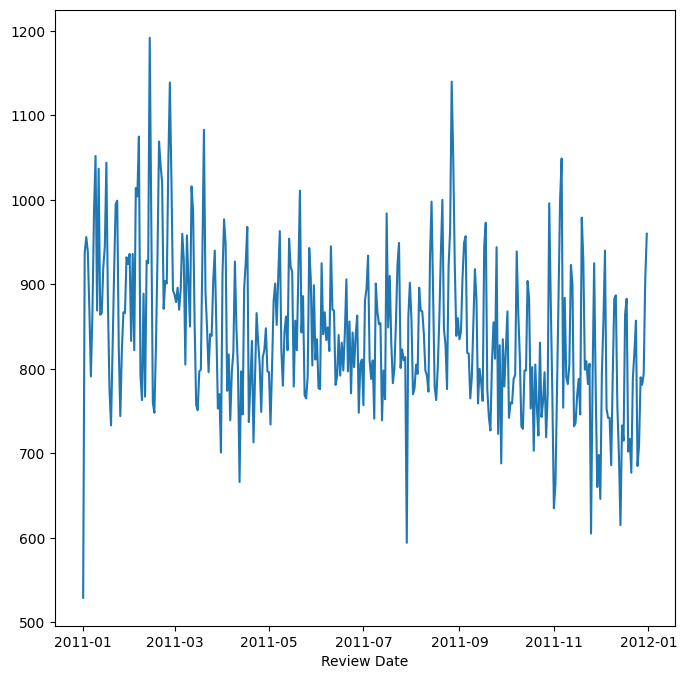

In [113]:
# matplotlib version of plot

fig, ax = plt.subplots(figsize = (8,8))

ax.plot(df_date['review_date'], df_date['review_overall'])
ax.set(xlabel = 'Review Date')

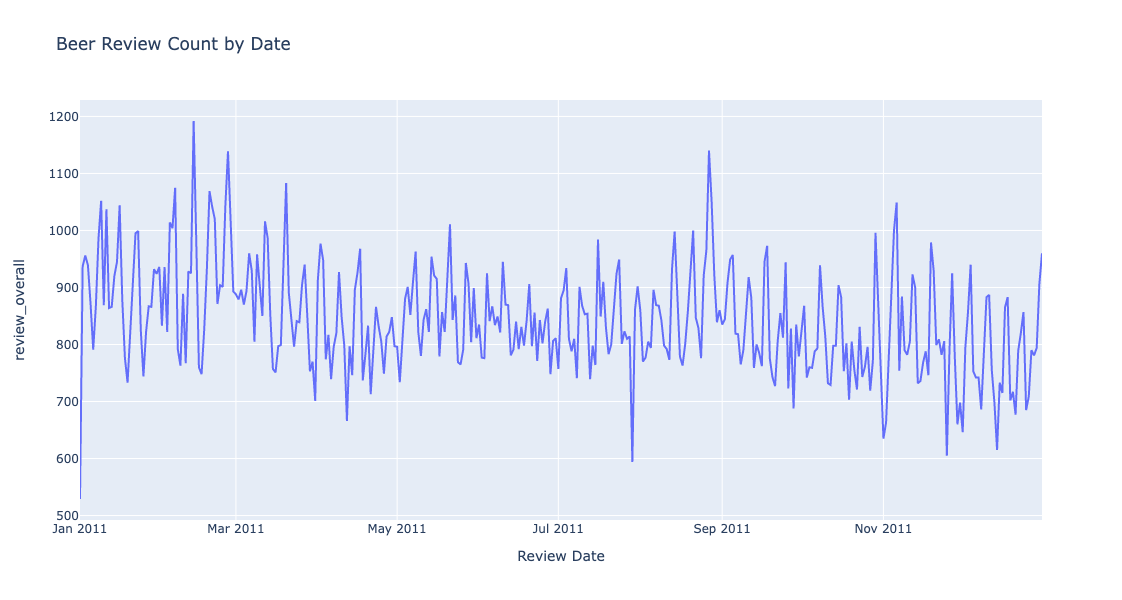

In [116]:
# plotly version of plot - notice the info on hover

fig = px.line(df_date, x = 'review_date', y = 'review_overall',  
        title='Beer Review Count by Date')

fig.update_layout(height = 600, xaxis_title = 'Review Date')

# hover over Feb 13 to see counts

<div class="alert alert-block alert-success"><b>Problem 5 (4 pts.)</b>: Create a new line plot using the count of reviews showing for each month (new x axis value).  Your figure is to include a <b><font color=black>title, x and y axis labels</font></b>.  You can choose to either use Matplotlib or Plotly.  You will need to prep the data and then display the plot.
</div>

In [150]:
# TODO create your dataframe that groups the review_overall count by month
df_date['review_month'] = df_date['review_date'].dt.month
df_monthly_reviews = pd.DataFrame(df_date.groupby('review_month')['review_overall'].count()).reset_index()
df_monthly_reviews

review_month  review_overall
0              1              31
1              2              28
2              3              31
3              4              30
4              5              31
5              6              30
6              7              31
7              8              31
8              9              30
9             10              31
10            11              30
11            12              31

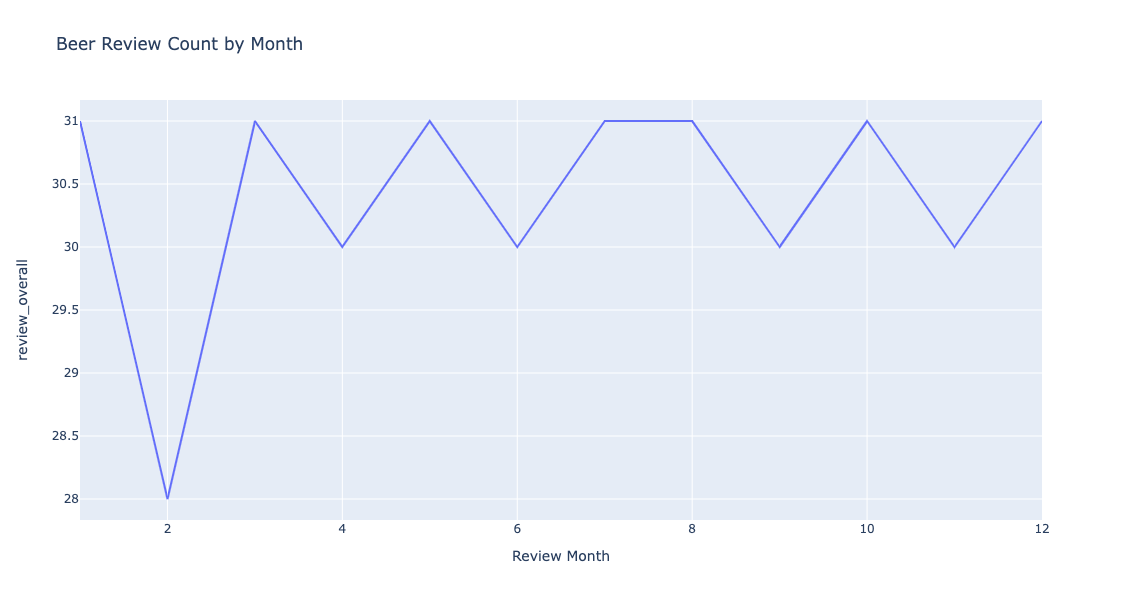

In [151]:
# TODO create a plot with Month on the x axis and counts on the y axis; Include a title, x and y axis label.
fig = px.line(df_monthly_reviews, x = 'review_month', y = 'review_overall',  
        title='Beer Review Count by Month')

fig.update_layout(height = 600, xaxis_title = 'Review Month')

## Seasons

We already created a variable so that each review has a value of either Summer, Sprint, Winter or Fall.  We want to know if there are beers that have a high number of ratings in one season which suggests they are a special beer with seasonal release.

In [152]:
df50 = pd.DataFrame(pd.crosstab(df['beer_name'],df['season'])) 
# get a total count of reviews per beer
df50['Total'] = df50['Fall'] + df50['Spring'] + df50['Summer'] + df50['Winter']
df50.head(10)

season                                         Fall  Spring  Summer  Winter  \
beer_name                                                                     
"Jessica & Brendan's" Bridal Ale                  0       1       0       0   
"Just One More" Scotch Ale                        3       0       1       0   
"Naughty Scot" Scotch Ale                         0       1       0       0   
"Requisite" Imperialistic Stout                   0       0       1       2   
"Shabadoo" Black & Tan Ale                        2       7       3       2   
"The Buk" Pale Ale                                1       1       2       3   
"The Camp" Barleywine                             0       0       0       1   
"The Wind Cried Mari..." Scottish Heather Ale     0       1       0       0   
"Woosta" Weizenbock                               1       0       2       0   
# 100                                            11       3       6      12   

season                                         Total  
beer_name                                             
"Jessica & Brendan's" Bridal Ale                   1  
"Just One More" Scotch Ale                         4  
"Naughty Scot" Scotch Ale                          1  
"Requisite" Imperialistic Stout                    3  
"Shabadoo" Black & Tan Ale                        14  
"The Buk" Pale Ale                                 7  
"The Camp" Barleywine                              1  
"The Wind Cried Mari..." Scottish Heather Ale      1  
"Woosta" Weizenbock                                3  
# 100                                             32

In [156]:
# We don't want beers with few reviews, so only keep beers with 50 or more reviews
df50 = df50[df50['Total'] >= 50]
df50 = df50.reset_index()
df50.head()

season                            beer_name  Fall  Spring  Summer  Winter  \
0                                        #9    46      56      76      56   
1                           10 Commandments    13      16      15      15   
2                                  1000 IBU     8      27      11      21   
3       110K+OT Batch #4 - Imperial Red Ale    14      10      40       1   
4                1554 Enlightened Black Ale    50      38      45      62   

season  Total  
0         234  
1          59  
2          67  
3          65  
4         195

In [157]:
# lets caculate percentages of total for each season

df50['fallPercent'] = (df50['Fall']/df50['Total']) * 100
df50['springPercent'] = (df50['Spring']/df50['Total']) * 100
df50['summerPercent'] = (df50['Summer']/df50['Total']) * 100
df50['winterPercent'] = (df50['Winter']/df50['Total']) * 100
df50.info()
df50.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   beer_name      1472 non-null   object 
 1   Fall           1472 non-null   int64  
 2   Spring         1472 non-null   int64  
 3   Summer         1472 non-null   int64  
 4   Winter         1472 non-null   int64  
 5   Total          1472 non-null   int64  
 6   fallPercent    1472 non-null   float64
 7   springPercent  1472 non-null   float64
 8   summerPercent  1472 non-null   float64
 9   winterPercent  1472 non-null   float64
dtypes: float64(4), int64(5), object(1)
memory usage: 115.1+ KB


season                                          beer_name  Fall  Spring  \
745            La Trappe Tripel (Koningshoeven / Dominus)     9      11   
754     Latitude 48 Deconstructed IPA - East Kent Gold...     9      64   
1098                          Samuel Adams Holiday Porter    56      19   
477                                                 Foret    10      27   
37                                                   Adam    45      43   

season  Summer  Winter  Total  fallPercent  springPercent  summerPercent  \
745         25      11     56    16.071429      19.642857      44.642857   
754         81       0    154     5.844156      41.558442      52.597403   
1098         3      99    177    31.638418      10.734463       1.694915   
477         13      11     61    16.393443      44.262295      21.311475   
37          61      56    205    21.951220      20.975610      29.756098   

season  winterPercent  
745         19.642857  
754          0.000000  
1098        55.932203  
477         18.032787  
37          27.317073

In [158]:
# let's look at Spring to see if any beers have the majority of reviews in Spring
df50[df50['springPercent'] > 75]

season                        beer_name  Fall  Spring  Summer  Winter  Total  \
90                              ApriHop     9     242      23      14    288   
243          Brooklyn Main Engine Start     1      50      13       1     65   
473                Fluffy White Rabbits     2      50       9       0     61   
729                          Koko Brown     3      48       4       5     60   
827                Mayflower Spring Hop     1      49       3       0     53   
873                   Narragansett Bock     0      43      10       0     53   
980          Peak Organic Simcoe Spring     1      40       1      10     52   
1072    Saint Arnold Divine Reserve #11     6      94      21       1    122   

season  fallPercent  springPercent  summerPercent  winterPercent  
90         3.125000      84.027778       7.986111       4.861111  
243        1.538462      76.923077      20.000000       1.538462  
473        3.278689      81.967213      14.754098       0.000000  
729        5.000000      80.000000       6.666667       8.333333  
827        1.886792      92.452830       5.660377       0.000000  
873        0.000000      81.132075      18.867925       0.000000  
980        1.923077      76.923077       1.923077      19.230769  
1072       4.918033      77.049180      17.213115       0.819672

<div class="alert alert-block alert-success"><b>Problem 6 (2 pts.)</b>: Show the number of beers for each season that have over 75 percent of their reviews in one season.<br>
    
The output should show the season and the number of beers that qualify where x represents the count: <br>
Spring has x beers <br>
Summer has x beers <br>
Fall has x beers <br>
Winter ha x beers
</div>

In [161]:
# TODO Show the beer review counts for each season with over 75 percent per season

for season in ['spring', 'summer', 'fall', 'winter']:
    col = f'{season}Percent'
    col_cnt = len(df50[df50[col] > 75])
    print(f'{season.capitalize()} has {col_cnt} beers')

Spring has 8 beers
Summer has 6 beers
Fall has 40 beers
Winter has 6 beers


<div class="alert alert-block alert-success"><b>Problem 7 (1 pts.)</b>: Which beer(s) would you suggest the client to look at in regards to a seasonal beer and why? 
</div>

In [179]:
df50[df50['fallPercent'] > 75].sort_values('Fall', ascending=False)[:5]

season                       beer_name  Fall  Spring  Summer  Winter  Total  \
1012                           Pumking   317      14      35      39    405   
1017                        Punkin Ale   265      13      12      24    314   
133      Bavarian-Styled Doppel Weizen   183       0       0      37    220   
1089    Samuel Adams Bonfire Rauchbier   179       0      38       8    225   
915                        Oktoberfest   175       9      16      20    220   

season  fallPercent  springPercent  summerPercent  winterPercent  
1012      78.271605       3.456790       8.641975       9.629630  
1017      84.394904       4.140127       3.821656       7.643312  
133       83.181818       0.000000       0.000000      16.818182  
1089      79.555556       0.000000      16.888889       3.555556  
915       79.545455       4.090909       7.272727       9.090909

In [183]:
df50[df50['winterPercent'] > 75].sort_values('Winter', ascending=False)[:5]

season                            beer_name  Fall  Spring  Summer  Winter  \
659     Hoptimum Double IPA - Beer Camp #19     8      88      18     423   
381                                  Diesel    10       8       3      64   
495           Frambozen Raspberry Brown Ale     5       7       2      50   
731         Krampus (Imperial Helles Lager)     3      10       1      48   
335                Corsendonk Christmas Ale     4       3       5      43   

season  Total  fallPercent  springPercent  summerPercent  winterPercent  
659       537     1.489758      16.387337       3.351955      78.770950  
381        85    11.764706       9.411765       3.529412      75.294118  
495        64     7.812500      10.937500       3.125000      78.125000  
731        62     4.838710      16.129032       1.612903      77.419355  
335        55     7.272727       5.454545       9.090909      78.181818

In [182]:
df50[df50['springPercent'] > 75].sort_values('Spring', ascending=False)[:5]

season                        beer_name  Fall  Spring  Summer  Winter  Total  \
90                              ApriHop     9     242      23      14    288   
1072    Saint Arnold Divine Reserve #11     6      94      21       1    122   
243          Brooklyn Main Engine Start     1      50      13       1     65   
473                Fluffy White Rabbits     2      50       9       0     61   
827                Mayflower Spring Hop     1      49       3       0     53   

season  fallPercent  springPercent  summerPercent  winterPercent  
90         3.125000      84.027778       7.986111       4.861111  
1072       4.918033      77.049180      17.213115       0.819672  
243        1.538462      76.923077      20.000000       1.538462  
473        3.278689      81.967213      14.754098       0.000000  
827        1.886792      92.452830       5.660377       0.000000

In [184]:
df50[df50['summerPercent'] > 75].sort_values('Summer', ascending=False)[:5]

season                                 beer_name  Fall  Spring  Summer  \
635                                   Hop Crisis    34       4     194   
1289                                 Summer Love    25       8     149   
22                               5th Anniversary     5       7      52   
308                     Citra Summer Blonde Brew     5       7      52   
885     New Holland Farmhouse Hatter Belgian IPA    15       1      52   

season  Winter  Total  fallPercent  springPercent  summerPercent  \
635         19    251    13.545817       1.593625      77.290837   
1289         2    184    13.586957       4.347826      80.978261   
22           2     66     7.575758      10.606061      78.787879   
308          0     64     7.812500      10.937500      81.250000   
885          1     69    21.739130       1.449275      75.362319   

season  winterPercent  
635          7.569721  
1289         1.086957  
22           3.030303  
308          0.000000  
885          1.449275

In [186]:
# TODO Which beer(s) would you suggest that the client to look at in regards to a seasonal beer and why?

# See markdown below

I would suggest the client to focus on fall season's popular beers since it has the most number of beer reviews that are over 75% in a year in high volume. 
Looking into the top 5 beer brands such as Pumking, Punkin Ale, Bavarian-Styled Doppel Weizen, Samuel Adams Bonfire Rauchbier, and Oktoberfest would be a good strategy to start with.

For other seasons, I would recommend looking into the top sold beers for each seasons such as Hoptimum Double IPA - Beer Camp #19 in the winter, ApriHop in the spring, and Hop Crisis in the summer. These 3 seasonal beers all have more than 250 reviews. Hoptimum Double IPA - Beer Camp #19 has 423 which is the most out of all. 